<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification in Tensorflow
## Exercises

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*

2022-07-21 14:41:51.382479: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-21 14:41:51.382788: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-21 14:41:51.388903: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-21 14:41:51.449032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-21 14:41:51.449512: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2659995000 Hz


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
__________________________________________________________

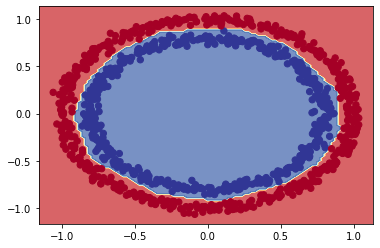

In [4]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 3, ReLU activation
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 4, ReLU activation
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 5, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_2.fit(X, y, epochs=100, verbose=0)

# Check model summary
model_2.summary()

# Plot Decision Boundary
plot_decision_boundary(model_2, X,y)

3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
________________________________________________________

[0.00026466729468666017, 1.0]

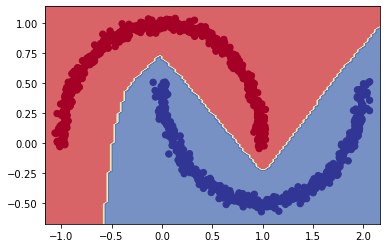

In [5]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_moons(n_samples, 
                    noise=0.03, 
                    random_state=42)

# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 3, ReLU activation
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 4, ReLU activation
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu), # hidden layer 5, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_3.fit(X, y, epochs=100, verbose=0)

# Check model summary
model_3.summary()

# Plot Decision Boundary
plot_decision_boundary(model_3, X,y)                    

# Evaluate the model
model_3.evaluate(X, y)

4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [6]:
def plot_multiple_images(images, labels, class_names):
    """Plots multiple images and their class labels. Adapted from Tensorflow Keras Classification
    Tutorial at https://www.tensorflow.org/tutorials/keras/classification

    Args:
        images (list): List of normalized images.
        labels (list): List of training labels corresponding to the images
    """
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]]).set_color('white')
    plt.show()


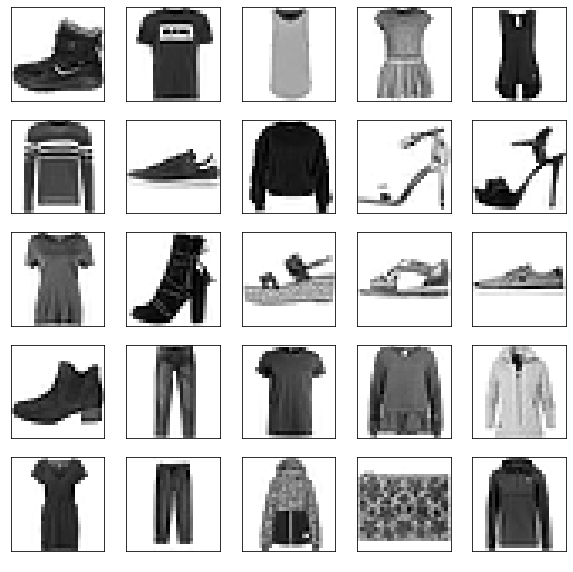

In [7]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_multiple_images(images=train_data, labels=train_labels, class_names=class_names)

5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [8]:
train_data_float = train_data.astype('float')
train_data_float[0].dtype

dtype('float64')

In [9]:
def softmax(X):
    return tf.math.exp(X) / tf.reduce_sum(tf.math.exp(X))
softmax(train_data_float[0])

<tf.Tensor: shape=(28, 28), dtype=float64, numpy=
array([[4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112],
       [4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-112, 4.48430554e-112,
        4.48430554e-112, 4.48430554e-11

6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [10]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
            xlabel="Predicted label",
            ylabel="True label",
            xticks=np.arange(n_classes), # create enough axis slots for each class
            yticks=np.arange(n_classes), 
            xticklabels=labels, # axes will labeled with class names (if they exist) or ints
            yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [15]:
# Set random seed
tf.random.set_seed(42)

# Format and normalize Data
train_data = train_data / 255.0
test_data = test_data / 255.0

# Set model hyperparameters
epochs = 40

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)), # input layer flattened from 28x28 to 784.
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(16, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(32, activation=tf.keras.activations.relu), # hidden layer 3, ReLU activation
  tf.keras.layers.Dense(16, activation=tf.keras.activations.relu), # hidden layer 4, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # output layer, sigmoid activation
])

# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))                

# Fit the model
history = model_6.fit(train_data, train_labels, epochs=epochs, validation_data=(test_data, test_labels), callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 58s 30ms/step - loss: 2.3027 - accuracy: 0.1024 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/40
1875/1875 [==============================] - 65s 35ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/40
1875/1875 [==============================] - 37s 20ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/40
1875/1875 [==============================] - 56s 30ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/40
1875/1875 [==============================] - 49s 26ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/40
1875/1875 [==============================] - 39s 21ms/step - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/40
1875/1875 [==============================] - 35s 19ms/step - loss: 2.3029 - accuracy: 0.0979 - val_loss: 2.3026 -

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (40,) and (10,)

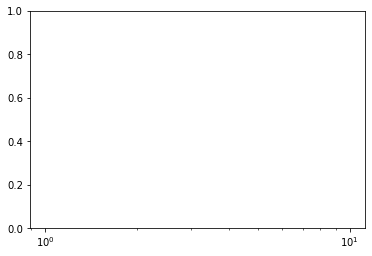

In [13]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Obtain predictions and convert to labels.
y_probs = model_6.predict(test_data)
y_preds = y_probs.argmax(axis=1)

# Plot confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15,15), text_size=10)


7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

## Extra curriculum 📖
* Watch 3Blue1Brown's neural networks video 2: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). After you're done, write 100 words about what you've learned.
  * If you haven't already, watch video 1: [*But what is a Neural Network?*](https://youtu.be/aircAruvnKk). Note the activation function they talk about at the end.
* Watch [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.
* Spend 1-hour reading [Michael Nielsen's Neural Networks and Deep Learning book](http://neuralnetworksanddeeplearning.com/index.html).
* Read the [ML-Glossary documentation on activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). Which one is your favourite?
  * After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".